# INTRODUCTION

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from decimal import Decimal
import datetime
import seaborn as sns
from math import sqrt
from itertools import *
import os
from IPython.display import HTML, display


Populating the interactive namespace from numpy and matplotlib


# DATA UNDERSTANDING


In [2]:
#Reading the Data from CSV using panda
couriersales = pd.read_csv('../data/couriersales.csv')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
couriersales.head()

,OrderDate,AccountNumber,Account_Type,PickupCity,DeliveryCity,PickupDate,expecteddeliveydate,Weight,DeclaredValue,Sales1Commission,...,servicecode,vatamount,amountdue,amountpaiddiff,prepaid,zone,Period,DateEntered,Service_Group,AccountCode
0,2019-06-04 09:56:31.147000000,11800182,CR,ISL,KAD,2019-05-13 00:00:00,2019-05-14 00:00:00,2.0,0.0,NaN,...,DIR,99.79,2095.63,2095.63,N,C,52019,2019-06-04 09:56:34.390000000,NaN,118
1,2019-06-04 09:58:35.120000000,99911805,CH,ISL,MLD,2019-05-21 00:00:00,2019-05-24 00:00:00,0.5,0.0,NaN,...,I/C,93.85,1970.85,1970.85,N,A,52019,2019-06-04 09:58:37.073000000,NaN,999
2,2019-01-31 22:21:51.323000000,99911811,CH,ISL,ISL,2019-01-29 00:00:00,2019-01-30 00:00:00,0.5,0.0,NaN,...,I/C,43.85,920.85,-29.15,N,A,12019,2019-01-31 22:21:51.323000000,DOMESTIC,999
3,2019-01-26 15:55:33.487000000,11000485,CR,ISL,MNA,2019-01-24 00:00:00,2019-01-25 00:00:00,1.0,0.0,NaN,...,NW,54.40,1142.40,1142.40,N,D,12019,2019-01-26 15:55:33.653000000,DOMESTIC,110
4,2019-06-04 11:23:55.940000000,11000422,CR,ISL,IBA,2019-05-30 00:00:00,2019-05-31 00:00:00,0.5,0.0,NaN,...,I/A,81.25,1381.25,1381.25,N,B,52019,2019-06-04 11:23:56.153000000,DOMESTIC,110


In [4]:
couriersales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500057 entries, 0 to 500056
Data columns (total 33 columns):
OrderDate              500057 non-null object
AccountNumber          500057 non-null object
Account_Type           500057 non-null object
PickupCity             500057 non-null object
DeliveryCity           500057 non-null object
PickupDate             500057 non-null object
expecteddeliveydate    500057 non-null object
Weight                 500057 non-null float64
DeclaredValue          500057 non-null float64
Sales1Commission       0 non-null float64
Sales1CommTotal        0 non-null float64
Sales2Commission       500057 non-null float64
Sales2CommTotal        500057 non-null float64
amountpaid             500057 non-null float64
BaseAmount             0 non-null float64
WeightAmount           500057 non-null float64
PackageAmount          500057 non-null float64
InsuranceAmount        495953 non-null float64
DiscountAmount         500057 non-null float64
SubTotalAmount    

In [5]:
# review number of missing values.
(couriersales.isnull().sum()[couriersales.isnull().sum().nonzero()[0]])/len(couriersales) 

Sales1Commission    1.000000
Sales1CommTotal     1.000000
BaseAmount          1.000000
InsuranceAmount     0.008207
Service_Group       0.015918
dtype: float64

# DATA REVIEW
Reviewing the data, there seems to be some 'NaN' values and some columns not needed. I will take a deep dive into the sales data as to get more insight.

In [6]:
default_sales = couriersales[['AccountNumber','PickupCity', 'DeliveryCity', 'Weight', 'Pieces' , 'Period', 'Service_Group','zone', 'DiscountAmount', 'TotalAmount']]

new_sales = default_sales.dropna(axis = 0, how = 'any')
new_sales

,AccountNumber,PickupCity,DeliveryCity,Weight,Pieces,Period,Service_Group,zone,DiscountAmount,TotalAmount
2,99911811,ISL,ISL,0.500000,1,12019,DOMESTIC,A,0.00,877.00
3,11000485,ISL,MNA,1.000000,1,12019,DOMESTIC,D,0.00,1088.00
4,11000422,ISL,IBA,0.500000,1,52019,DOMESTIC,B,325.00,1625.00
5,11000422,ISL,ENU,0.500000,1,52019,DOMESTIC,C,503.80,2519.00
6,10600415,UHA,ABA,0.500000,1,52019,DOMESTIC,B,0.00,1250.00
7,10400398,ISL,ABV,0.500000,1,52019,DOMESTIC,C,114.00,1140.00
9,11000472,ISL,PHC,0.500000,1,62019,DOMESTIC,C,154.24,3856.00
10,99911002,ISL,MLD,0.500000,1,52019,DOMESTIC,A,0.00,877.00
11,99911002,ISL,ISL,0.500000,1,52019,DOMESTIC,A,0.00,877.00
12,11800107,ISL,ABV,0.500000,1,52019,DOMESTIC,C,385.60,3856.00


# DATA PREPARATION

# using seaborn to visualize the data

In [11]:
# The function will be used to plot seaborn data.
def Display_graph(columns, data):
    plt.figure(figsize=(20,20))
    plt.xticks(rotation=90)
    sns.countplot((data)[(columns)],
                 order = data[columns].value_counts().index)
    plt.show()
    

In [7]:
# checking
(new_sales.Period.value_counts())/(new_sales.Period.count())

32019    0.175246
52019    0.174199
42019    0.165248
12019    0.163441
22019    0.150889
62019    0.142254
72019    0.028722
Name: Period, dtype: float64

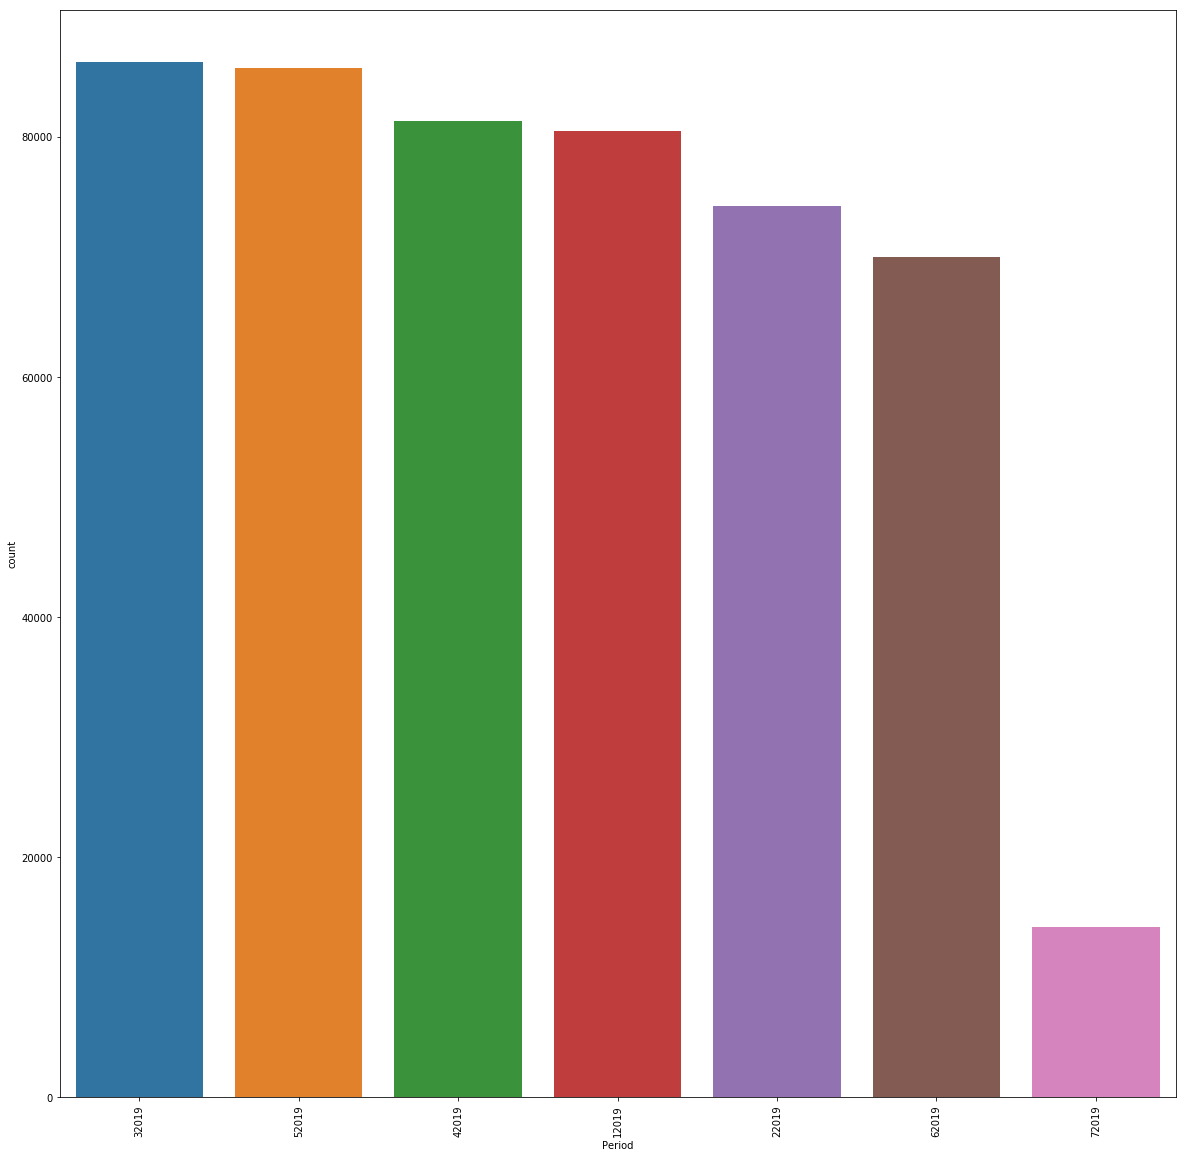

In [12]:
Display_graph('Period', new_sales)

In [13]:
(new_sales.AccountNumber.value_counts())/(new_sales.AccountNumber.count())

10600417    0.043304
11000422    0.034371
10600509    0.031687
10400427    0.025631
11800182    0.023879
11000485    0.017275
10400438    0.015497
10600329    0.014274
10600509    0.011581
22300241    0.010880
99910101    0.009004
11000247    0.008691
99931401    0.008687
11800001    0.008429
10400326    0.008275
10400305    0.008257
10400427    0.008023
10600433    0.007860
10600415    0.007834
10400421    0.007161
10600520    0.006517
70300062    0.006271
10200011    0.006226
70100036    0.006135
70300063    0.005769
70100033    0.005767
99922101    0.005627
31300357    0.005588
10600233    0.005491
70200020    0.005286
              ...   
22200020    0.000002
20500067    0.000002
22300403    0.000002
20700036    0.000002
20300312    0.000002
20200390    0.000002
31900036    0.000002
10200476    0.000002
22500120    0.000002
22500101    0.000002
70100016    0.000002
40700016    0.000002
10900267    0.000002
70100009    0.000002
22400107    0.000002
10900215    0.000002
11000462    0

In [14]:
# for accounts with the highest number of sales.


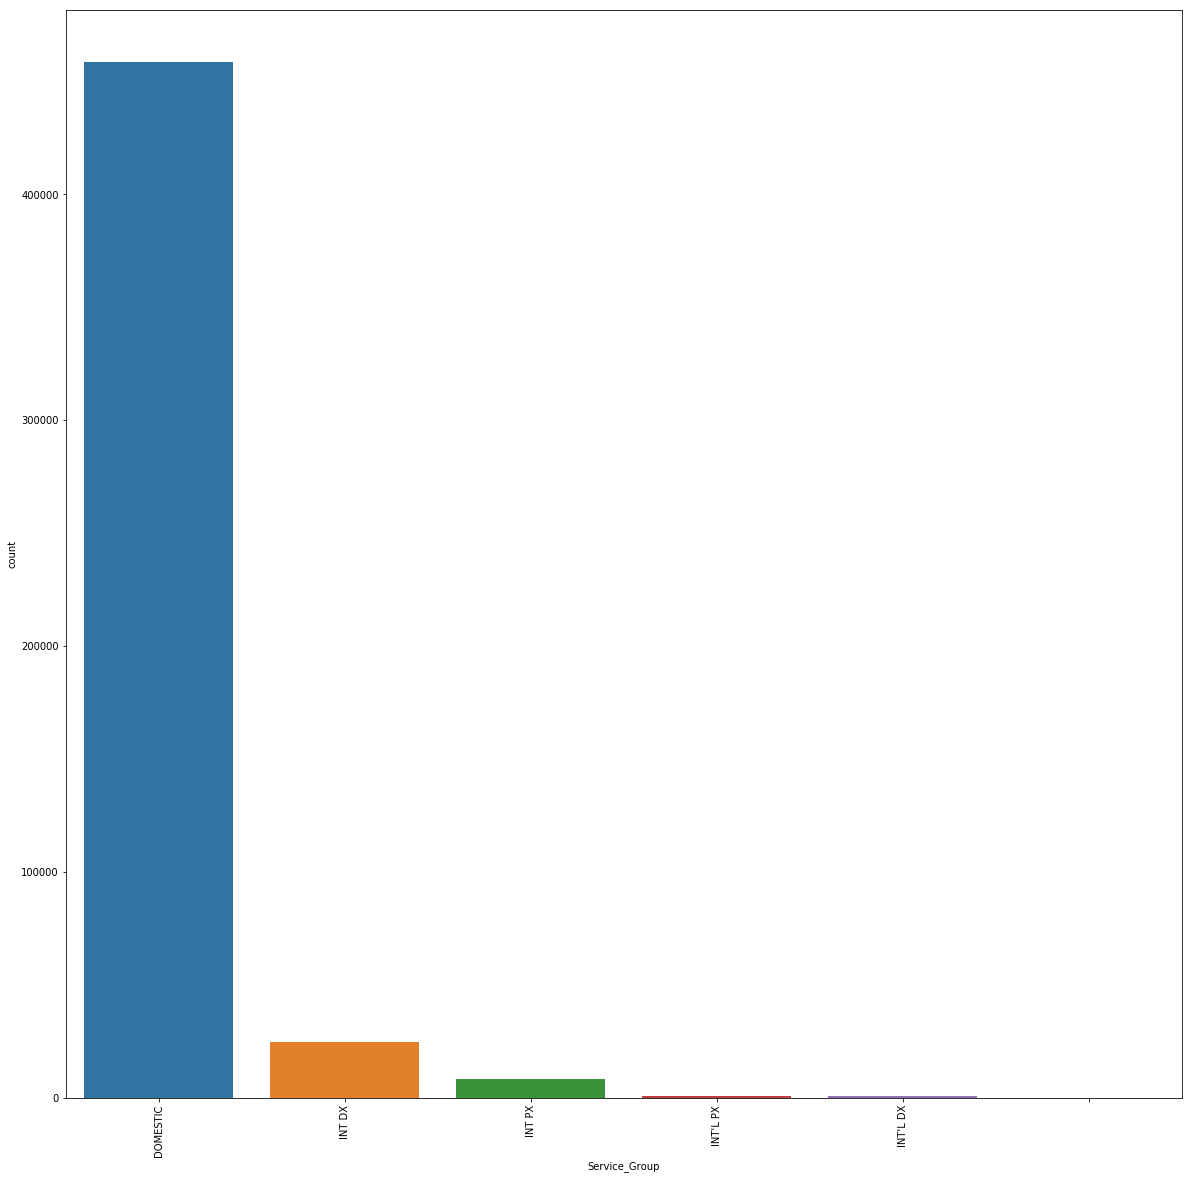

In [15]:
Display_graph('Service_Group', new_sales)

In [16]:
pickup_city = new_sales.groupby('PickupCity').sum()
top_pickup_city = pickup_city.nlargest(20,'TotalAmount')
top_pickup_city

,Weight,Pieces,Period,DiscountAmount,TotalAmount
PickupCity,,,,,
MLD,1.144553e+07,686837,5035886592,4.840999e+07,1.070306e+09
ISL,3.596499e+05,151766,5244409667,4.902321e+07,5.293815e+08
ABV,2.323222e+05,67320,2049200276,1.733224e+07,2.706807e+08
PHC,1.182537e+05,30481,950837161,4.907450e+06,1.499793e+08
IBA,1.174635e+05,27811,523881677,1.701328e+06,7.446283e+07
BNI,4.606726e+04,11586,315570479,1.832981e+06,4.942986e+07
ENU,1.849597e+04,11293,398012541,1.841267e+06,4.237394e+07
ORI,3.020346e+04,6430,225694357,2.017786e+06,3.597573e+07
KAN,2.681294e+04,9338,285935327,9.324869e+05,3.471492e+07


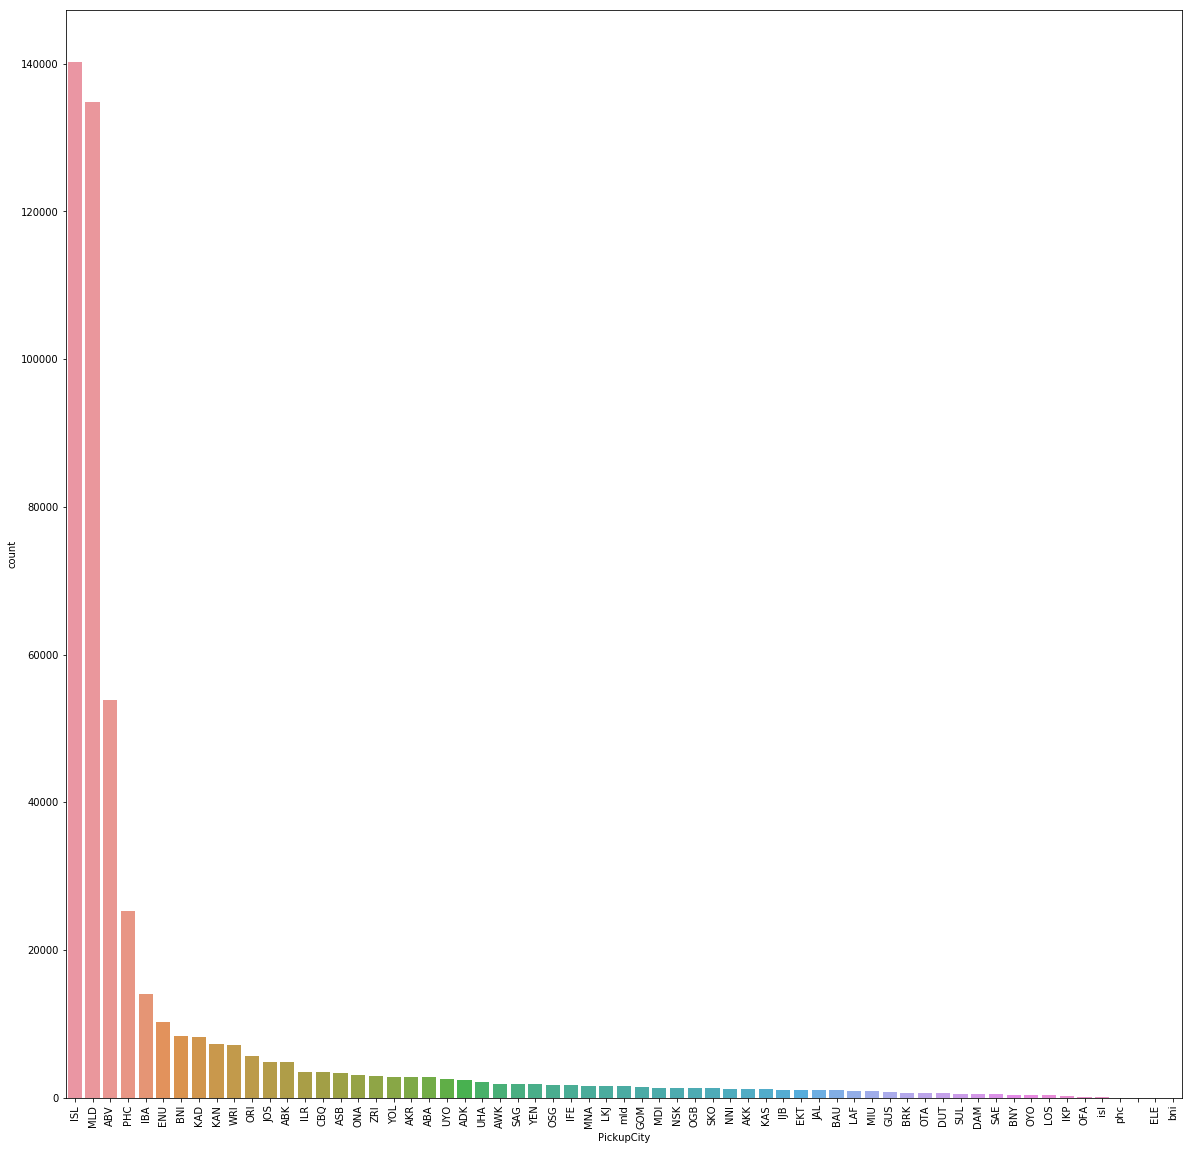

In [17]:
Display_graph('PickupCity', new_sales)

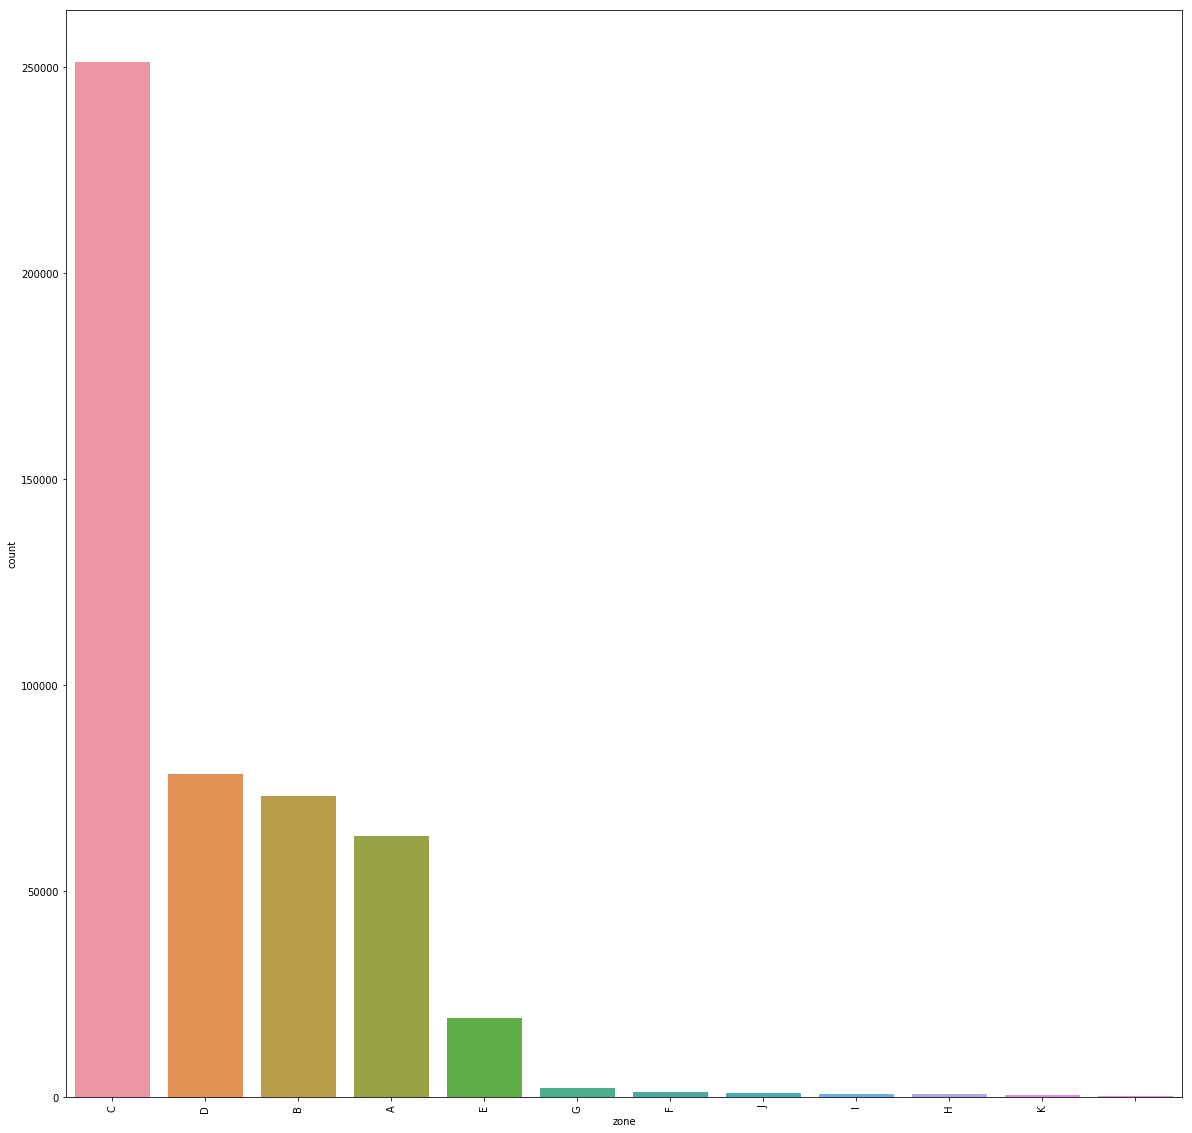

In [18]:
Display_graph('zone', new_sales)

In [21]:
#reduce data to top 20 delivery city
pickup_city = new_sales.groupby('DeliveryCity').count()
top_delivery_city = pickup_city.nlargest(20,'PickupCity')
top_delivery_city

,AccountNumber,PickupCity,Weight,Pieces,Period,Service_Group,zone,DiscountAmount,TotalAmount
DeliveryCity,,,,,,,,,
ABV,68536,68536,68536,68536,68536,68536,68536,68536,68536
MLD,65167,65167,65167,65167,65167,65167,65167,65167,65167
ISL,60890,60890,60890,60890,60890,60890,60890,60890,60890
PHC,33886,33886,33886,33886,33886,33886,33886,33886,33886
IBA,18720,18720,18720,18720,18720,18720,18720,18720,18720
BNI,15436,15436,15436,15436,15436,15436,15436,15436,15436
KAD,13467,13467,13467,13467,13467,13467,13467,13467,13467
KAN,13223,13223,13223,13223,13223,13223,13223,13223,13223
ENU,12885,12885,12885,12885,12885,12885,12885,12885,12885


In [ ]:
# reducing the 'delivery city' as represented by the top city.
delivery_City_list = ['ISL','MLD','ABV', 'PHC', 'IBA','ENU','BNI']

In [ ]:
#applying same  property_type_list above.
delivery_data = new_sales.DeliveryCity.isin(delivery_City_list) 
working_sales_data = new_sales[delivery_data]
working_sales_data 

In [ ]:
def Return_data_by_colum_name(col_name, data):    
    column_type = [col_name]
    is_column_type_data = working_sales_data.DeliveryCity.isin(column_type) 
    new_data = working_sales_data[is_column_type_data]
    return new_data

In [ ]:
city_list = Return_data_by_colum_name('ISL', working_sales_data)
city_list

# DATA MODELING
Let's get an insight on the data so far.

In [ ]:
def category_plot(x_data, y_data, data_list):
    """Description: This function can be used to read the file in the data_list and create a catplot based on the
    x_data and y_data.
    
    Arguments: 
    x_data: Column in data_list that you want to plot on the x axis (Put as string). 
    y_ data: Column in the data_list that you want to plot on the y axis (Put as string).
    data_list: The datalist that contains the x_data and y_data as columns."""
   
    plt.figure(figsize=(10, 8))
    sns.stripplot(x=x_data, y=y_data, data=data_list, size=5)

In [ ]:
category_plot('TotalAmount', 'PickupCity', city_list)